By: Kaleb Lonari Simanungkalit

In [1]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile, os
import shutil
from google.colab import drive
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.listdir("/content/drive/My Drive/Dicoding")

['rockpaperscissors.zip', 'Copy of RSP.ipynb']

In [4]:
# melakukan ekstraksi pada file zip
local_zip = '/content/drive/My Drive/Dicoding/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/My Drive/Dicoding')
zip_ref.close()

In [5]:
os.listdir('/content/drive/My Drive/Dicoding/')

['rockpaperscissors.zip', 'Copy of RSP.ipynb', 'rockpaperscissors', '__MACOSX']

## **Split Data Train and Data Validation**

**Directory for Data Train**

In [6]:
try:  
    os.mkdir('/content/drive/My Drive/Dicoding/data_train', 0o755)  
except OSError as error:  
    print(error)   

In [7]:
try:  
    os.mkdir('/content/drive/My Drive/Dicoding/data_train/rock', 0o755)  
except OSError as error:  
    print(error)   

In [8]:
try:  
    os.mkdir('/content/drive/My Drive/Dicoding/data_train/paper', 0o755)  
except OSError as error:  
    print(error)   

In [9]:
try:  
    os.mkdir('/content/drive/My Drive/Dicoding/data_train/scissors', 0o755)  
except OSError as error:  
    print(error)   

**Directory for Data Validation**

In [10]:
try:  
    os.mkdir('/content/drive/My Drive/Dicoding/data_validation', 0o755)  
except OSError as error:  
    print(error)   

In [11]:
try:  
    os.mkdir('/content/drive/My Drive/Dicoding/data_validation/paper', 0o755)  
except OSError as error:  
    print(error)   

In [12]:
try:  
    os.mkdir('/content/drive/My Drive/Dicoding/data_validation/rock', 0o755)  
except OSError as error:  
    print(error)   

In [13]:
try:  
    os.mkdir('/content/drive/My Drive/Dicoding/data_validation/scissors', 0o755)  
except OSError as error:  
    print(error)   

Split data to each directory

In [14]:
base_dir = ('/content/drive/My Drive/Dicoding/rockpaperscissors/')
rock = os.path.join(base_dir, 'rock')
paper = os.path.join(base_dir, 'paper')
scissors = os.path.join(base_dir, 'scissors')

In [15]:
rock_train, rock_val = train_test_split(os.listdir(rock), test_size = 0.4 )
paper_train, paper_val = train_test_split(os.listdir(paper), test_size = 0.4)
scissors_train, scissors_val = train_test_split(os.listdir(scissors), test_size = 0.4)

## **Move to Data Train**

In [16]:
#move rock_train to directory data_train
for filename in rock_train:
    shutil.move(rock + '/' + filename, '/content/drive/My Drive/Dicoding/data_train/rock')

In [17]:
#move paper_train to directory data_train
for filename in paper_train:
    shutil.move(paper + '/' + filename, '/content/drive/My Drive/Dicoding/data_train/paper')

In [18]:
#move scissors_train to directory data_train
for filename in scissors_train:
    shutil.move(scissors + '/' + filename, '/content/drive/My Drive/Dicoding/data_train/scissors')

## **Move to Data Validation**

In [19]:
#move rock_val to directory data_train
for filename in rock_val:
    shutil.move(rock + '/' + filename, '/content/drive/My Drive/Dicoding/data_validation/rock')

In [20]:
#move rock_val to directory data_train
for filename in paper_val:
    shutil.move(paper + '/' + filename, '/content/drive/My Drive/Dicoding/data_validation/paper')

In [21]:
#move rock_val to directory data_train
for filename in scissors_val:
    shutil.move(scissors + '/' + filename, '/content/drive/My Drive/Dicoding/data_validation/scissors')

**Check content of Data Train Directory**

In [22]:
print('1. Number of Rock', len(os.listdir('/content/drive/My Drive/Dicoding/data_train/rock')))
print('2. Number of Paper', len(os.listdir('/content/drive/My Drive/Dicoding/data_train/paper')))
print('3. Number of Scissors', len(os.listdir('/content/drive/My Drive/Dicoding/data_train/scissors')))

1. Number of Rock 435
2. Number of Paper 427
3. Number of Scissors 450


**Check content of Data Validation Directory**

In [23]:
print('1. Number of Rock', len(os.listdir('/content/drive/My Drive/Dicoding/data_validation/rock')))
print('2. Number of Paper', len(os.listdir('/content/drive/My Drive/Dicoding/data_validation/paper')))
print('3. Number of Scissors', len(os.listdir('/content/drive/My Drive/Dicoding/data_validation/scissors')))

1. Number of Rock 291
2. Number of Paper 285
3. Number of Scissors 300


## **Image Augmentation**

In [24]:
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [25]:
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Dicoding/data_train',  
        target_size=(150, 150),  
        batch_size=32,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        '/content/drive/My Drive/Dicoding/data_validation',
        target_size=(150, 150), 
        batch_size=32, 
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


## **Run Model**

In [26]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [28]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 49s - loss: 1.0236 - accuracy: 0.5063 - val_loss: 0.8331 - val_accuracy: 0.5938
Epoch 2/20
25/25 - 49s - loss: 0.5133 - accuracy: 0.8012 - val_loss: 0.3253 - val_accuracy: 0.8813
Epoch 3/20
25/25 - 48s - loss: 0.2983 - accuracy: 0.8988 - val_loss: 0.2868 - val_accuracy: 0.9062
Epoch 4/20
25/25 - 53s - loss: 0.2248 - accuracy: 0.9237 - val_loss: 0.3480 - val_accuracy: 0.8250
Epoch 5/20
25/25 - 48s - loss: 0.2388 - accuracy: 0.9137 - val_loss: 0.2029 - val_accuracy: 0.9187
Epoch 6/20
25/25 - 47s - loss: 0.1921 - accuracy: 0.9312 - val_loss: 0.1358 - val_accuracy: 0.9563
Epoch 7/20
25/25 - 47s - loss: 0.1283 - accuracy: 0.9625 - val_loss: 0.1009 - val_accuracy: 0.9688
Epoch 8/20
25/25 - 47s - loss: 0.1725 - accuracy: 0.9375 - val_loss: 0.1512 - val_accuracy: 0.9375
Epoch 9/20
25/25 - 47s - loss: 0.1559 - accuracy: 0.9500 - val_loss: 0.0786 - val_accuracy: 0.9937
Epoch 10/20
25/25 - 47s - loss: 0.1073 - accuracy: 0.9688 - val_loss: 0.1028 - val_accuracy: 0.9563
Epoch 11/

## **Testing Model**

Saving 1DxbXT3M2qiMjCmC.png to 1DxbXT3M2qiMjCmC.png
1DxbXT3M2qiMjCmC.png
rock


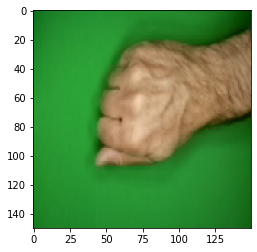

In [31]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0] != 0:
    print('paper')
  elif classes[0,1] != 0:
    print('rock')
  else:
    print('scissors')